# A [Jupyter](https://jupyter.org/) Kernel for [PowerShell](https://github.com/PowerShell/PowerShell)

This kernel is being written in C#, and in the process, I've taken some messaging code from the [iCSharp kernel](https://github.com/zabirauf/icsharp) and made a generic library for .Net with a re-usable core for anyone who needs to create [Jupyter](https://jupyter.org/) kernels in .Net languages -- so feel free to borrow that if you like (it's under the Apache license).

## Install

I am finally doing a preliminary release: you can download from the releases link, unzip it somewhere, and run the `Install.ps1` script. Note that if you run this on Linux or OS X you should expect to see only "PowerShell (Core)" but on Windows you'll see both -- but only the "PowerShell (Full)" will actually work unless you have PowerShell Core installed in your PATH and working.

## Current Status

So far, I am only handling two messages:

* KernelInfo request
* Execute request

The PowerShell kernel is _working_, and returning text output _and errors_ as on the console (see examples below).

## Features

* `Write-Jupyter` command allows you to customize output (not in a released build yet) by specifying the mime type. See below. 
* There's a config option (in `PowerShell-Kernel.Config.json`) to always output the actual objects as application/json data, in addition to the plain text output.

## PowerShell Core *and Full*

In order to get cross-platform support, this kernel is using [PowerShell Core](https://github.com/PowerShell/PowerShell), which means you'll want to have PowerShell 6 Beta 3 installed to try it out. As of today, it also builds for "Full Framework" Windows PowerShell!

To build it yourself --or to run the "PowerShell (Core)" kernel-- you need [dotnet core 2 preview](https://www.microsoft.com/net/core/preview).  You can build it by running `dotnet restore; dotnet build` from the root. If you want to contribute --and want to build it in Visual Studio-- you need [VS 2017 Preview version 15.3](https://www.visualstudio.com/vs/preview/).

In [3]:
$PSVersionTable

Name                           Value                                                                                    
----                           -----                                                                                    
PSVersion                      5.1.16215.1000                                                                           
PSEdition                      Desktop                                                                                  
PSCompatibleVersions           {1.0, 2.0, 3.0, 4.0...}                                                                  
BuildVersion                   10.0.16215.1000                                                                          
CLRVersion                     4.0.30319.42000                                                                          
WSManStackVersion              3.0                                                                                      
PSRemotingProtocolVersion      2

If we ran that same command in the "PowerShell (Core)" engine, you would see a different, result of course. Incidentally, I don't have any idea what the deal with the "GitCommitId" is -- I need to file a bug on the PowerShell repo about that.

In [1]:
$PSVersionTable

Name                           Value                                                                                    
----                           -----                                                                                    
PSVersion                      6.0.0-beta                                                                               
PSEdition                      Core                                                                                     
GitCommitId                    Could not find file 'C:\Users\Joel\.nuget\packages\system.management.automation\6.0.0-...
OS                             Microsoft Windows 10.0.16215                                                             
Platform                       Win32NT                                                                                  
PSCompatibleVersions           {1.0, 2.0, 3.0, 4.0...}                                                                  
PSRemotingProtocolVersion      2

The rest of these examples actually output the same things regardless of whether you run them in PowerShell (Full) or PowerShell (Core). And I think I will probably rename "PowerShell (Full)" after I sleep on it ...

In [4]:
Get-ChildItem

Directory: C:\Users\Joel\Projects\Jupyter\Jupyter-PowerShell


Mode                LastWriteTime         Length Name                                                                   
----                -------------         ------ ----                                                                   
d-----        6/29/2017   2:55 AM                .ipynb_checkpoints                                                     
d-----         7/7/2017   3:03 AM                Jupyter                                                                
d-----        6/29/2017  10:35 PM                Output                                                                 
d-----         7/7/2017   3:07 AM                PowerShell-Kernel                                                      
-a----        6/16/2017  11:57 PM           2581 .gitattributes                                                         
-a----        6/28/2017   1:04 AM           4597 .gitignore                               

In [7]:
$Files = Get-ChildItem -File

## No Output.

Obviously there's no output from that command, because it's all collected in the variable.

I put that here was just to demonstrate that variables stick around so you can use them in other commands in the future, so let's look at the size of those files again:

In [6]:
$Files | Measure Length -Sum

Count    : 10
Average  : 
Sum      : 50961
Maximum  : 
Minimum  : 
Property : Length

In [7]:
Set-Location PowerShell-Kernel

Again, any command with no output just has ... no output.

### But it affects the state.

This means you will be able to use this for literate devops...

Oh, and since I mentioned you can do HTML output, here's PowerShell's built-in ConvertTo-Html

In [8]:
Get-ChildItem -file | ConvertTo-Html Mode, LastWriteTime, Name, Length

Mode,LastWriteTime,Name,Length
-a----,7/6/2017 3:07:41 AM,ExecutionResult.cs,1541
-a----,7/7/2017 12:08:29 AM,Kernel.cs,2901
-a----,7/4/2017 2:53:22 AM,MessagingHost.cs,210
-a----,7/6/2017 8:07:52 PM,PowerShell-Kernel.Config.json,185
-a----,7/6/2017 11:29:47 PM,PowerShell-Kernel.csproj,3035
-a----,7/7/2017 3:07:02 AM,PowerShellEngine.cs,8417
-a----,6/26/2017 1:54:08 PM,ScalarHelper.cs,2624
-a----,7/7/2017 12:00:55 AM,SessionHelper.cs,963


In [9]:
Get-Help Write-Jupyter

NAME
    Write-Jupyter
    
SYNTAX
    Write-Jupyter -InputObject <psobject>  [<CommonParameters>]
    
    Write-Jupyter -InputObject <psobject> [-Id <string>]  [<CommonParameters>]
    
    Write-Jupyter -InputObject <psobject> [-Update <string>]  [<CommonParameters>]
    

ALIASES
    None
    

REMARKS
    None

In [2]:
$imageUrl = 
'https://upload.wikimedia.org/wikipedia/commons/2/2f/PowerShell_5.0_icon.png'
@{ "html" = "<img src='$imageUrl' />" } | Write-Jupyter

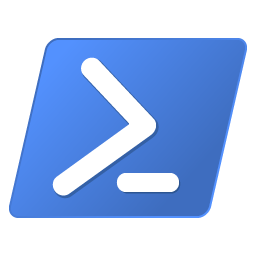

In [ ]:
# TODO: add -Metadata to Write-Jupyter so we can set the size
@{ 
"png" = (Invoke-WebRequest $imageUrl -UseBasicParsing).RawContentStream.GetBuffer()
} | Write-Jupyter

In [15]:
# TODO: fix need to -join?
# TODO: fix double-json encoding
[PSCustomObject]@{
"html" = -join ($Files | ConvertTo-Html Mode, LastWriteTime, Name, Length) 
#"json" = -join ($Files | ConvertTo-Json)
} | Write-Jupyter

Mode,LastWriteTime,Name,Length
-a----,6/16/2017 11:57:42 PM,.gitattributes,2581
-a----,6/28/2017 1:04:01 AM,.gitignore,4597
-a----,7/3/2017 1:54:06 AM,Install.ps1,5906
-a----,6/27/2017 9:38:09 PM,Jupyter-PowerShell.sln,1903
-a----,6/26/2017 1:54:08 PM,kernel.json,289
-a----,6/24/2017 3:07:27 AM,LICENSE.md,1140
-a----,7/4/2017 12:31:24 AM,nuget.config,352
-a----,7/7/2017 3:47:38 AM,ReadMe.ipynb,24278
-a----,6/28/2017 1:27:51 AM,ReadMe.md,2540
-a----,7/7/2017 3:31:36 AM,Release.ipynb,7375


### I fixed [3](https://github.com/Jaykul/Jupyter-PowerShell/issues/3) so errors show up:

In [ ]:
Get-ChildItem nosuchfile

Get-ChildItem : Cannot find path 'C:\Users\Joel\Projects\Jupyter\Jupyter-PowerShell\PowerShell-Kernel\nosuchfile' because it does not exist.


PathNotFound,Microsoft.PowerShell.Commands.GetChildItemCommand: Get-ChildItem : Cannot find path 'C:\Users\Joel\Projects\Jupyter\Jupyter-PowerShell\PowerShell-Kernel\nosuchfile' because it does not exist.


In [ ]:
iwr natas2.natas.labs.overthewire.org

iwr : 

401 Unauthorized

Unauthorized
This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.

Apache/2.4.10 (Debian) Server at natas2.natas.labs.overthewire.org Port 80




WebCmdletWebResponseException,Microsoft.PowerShell.Commands.InvokeWebRequestCommand: iwr : 

401 Unauthorized

Unauthorized
This server could not verify that you
are authorized to access the document
requested.  Either you supplied the wrong
credentials (e.g., bad password), or your
browser doesn't understand how to supply
the credentials required.

Apache/2.4.10 (Debian) Server at natas2.natas.labs.overthewire.org Port 80




In [ ]:
Get-Credential -UserName Joel -Message "Type 'Password'"

Get-Credential : A command that prompts the user failed because the host program or the command type does not support user interaction. The host was attempting to request confirmation with the following message: Type 'Password'


HostFunctionNotImplemented,Microsoft.PowerShell.Commands.GetCredentialCommand: Get-Credential : A command that prompts the user failed because the host program or the command type does not support user interaction. The host was attempting to request confirmation with the following message: Type 'Password'
